<a href="https://colab.research.google.com/github/jpatra85/ColabTF_EDU/blob/master/Loan_Prediction_All_Features_7th%20June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/df_ft_out.csv"

'/content/drive/My Drive/df_ft_out.csv'


In [0]:
# All features
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/df_ft_out_all_ft.csv')
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [0]:
# Selective features
#import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/df_ft_out.csv')

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
print(tf.__version__)


2.2.0


In [121]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop('loan_amount')
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('loan_amount')
test_labels = test_dataset.pop('loan_amount')

train_dataset.head()


,primary_business_11th and 12th,primary_business_Accessories Vendor,primary_business_Agarbati Making,primary_business_Agarbati making and selling,primary_business_Agarbatti sales,primary_business_Applique work,primary_business_Artificial Flower Making,primary_business_Artificial Jewellery Business,primary_business_Artisan,primary_business_Auto Rickshaw,primary_business_Automobiles,primary_business_Ayurvedic herb business,primary_business_BLANKET WEAVING BUSINESS,primary_business_BREAK FAST SHOP,primary_business_BREAKFAST STALL,primary_business_Bag Business,primary_business_Bag Making,primary_business_Bags manufacturing,primary_business_Bakery,primary_business_Balloon Business.,primary_business_Bamboo craft,primary_business_Banana Cultivation,primary_business_Band Baja shop,primary_business_Bandhni work,primary_business_Bangles business,primary_business_Basket making business,primary_business_Battery shop,primary_business_Beauty parlour,primary_business_Beauty salon,primary_business_Bedspread selling,primary_business_Beedi rolling business,primary_business_Bentex Jwelary,primary_business_Betal Nut Seller,primary_business_Betel Farm,primary_business_Betel Shop,primary_business_Betel shop,primary_business_Bicycle Repair Shop,primary_business_Bicylces,primary_business_Bird Selling,primary_business_Black smith,...,type_of_house_type_of_houseR,type_of_house_type_of_houseT1,type_of_house_type_of_houseT2,water_availabity_water_availabity0.0,water_availabity_water_availabity0.5,water_availabity_water_availabity1.0,primary_business_bins_primary_business0,primary_business_bins_primary_business1,primary_business_bins_primary_business2,primary_business_bins_primary_business3,primary_business_bins_primary_business4,loan_purpose_bins_loan_purpose0,loan_purpose_bins_loan_purpose1,loan_purpose_bins_loan_purpose2,loan_purpose_bins_loan_purpose3,annual_income_bins_income_group0,annual_income_bins_income_group1,annual_income_bins_income_group2,annual_income_bins_income_group3,annual_income_bins_income_group4,monthly_expense_bins_monthly_expense0,monthly_expense_bins_monthly_expense1,monthly_expense_bins_monthly_expense2,monthly_expense_bins_monthly_expense3,monthly_expense_bins_monthly_expense4,occupants_count_bins_occupants_grounps0,occupants_count_bins_occupants_grounps1,occupants_count_bins_occupants_grounps2,occupants_count_bins_occupants_grounps3,house_area_bins_house_area_group0,house_area_bins_house_area_group1,house_area_bins_house_area_group2,house_area_bins_house_area_group3,loan_installment_bins_loan_installment_group0,loan_installment_bins_loan_installment_group1,loan_installment_bins_loan_installment_group2,loan_tenure_bins_loan_tenure_group0,loan_tenure_bins_loan_tenure_group1,loan_tenure_bins_loan_tenure_group2,loan_tenure_bins_loan_tenure_group3
4914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
6103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
15459,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



In [125]:
print(df.isnull().sum().sum())
print(normed_train_data.isnull().sum().sum())
print(normed_test_data.isnull().sum().sum())
normed_train_data.head()

0
0
0


,primary_business_11th and 12th,primary_business_Accessories Vendor,primary_business_Agarbati Making,primary_business_Agarbati making and selling,primary_business_Agarbatti sales,primary_business_Applique work,primary_business_Artificial Flower Making,primary_business_Artificial Jewellery Business,primary_business_Artisan,primary_business_Auto Rickshaw,primary_business_Automobiles,primary_business_Ayurvedic herb business,primary_business_BLANKET WEAVING BUSINESS,primary_business_BREAK FAST SHOP,primary_business_BREAKFAST STALL,primary_business_Bag Business,primary_business_Bag Making,primary_business_Bags manufacturing,primary_business_Bakery,primary_business_Balloon Business.,primary_business_Bamboo craft,primary_business_Banana Cultivation,primary_business_Band Baja shop,primary_business_Bandhni work,primary_business_Bangles business,primary_business_Basket making business,primary_business_Battery shop,primary_business_Beauty parlour,primary_business_Beauty salon,primary_business_Bedspread selling,primary_business_Beedi rolling business,primary_business_Bentex Jwelary,primary_business_Betal Nut Seller,primary_business_Betel Farm,primary_business_Betel Shop,primary_business_Betel shop,primary_business_Bicycle Repair Shop,primary_business_Bicylces,primary_business_Bird Selling,primary_business_Black smith,...,type_of_house_type_of_houseR,type_of_house_type_of_houseT1,type_of_house_type_of_houseT2,water_availabity_water_availabity0.0,water_availabity_water_availabity0.5,water_availabity_water_availabity1.0,primary_business_bins_primary_business0,primary_business_bins_primary_business1,primary_business_bins_primary_business2,primary_business_bins_primary_business3,primary_business_bins_primary_business4,loan_purpose_bins_loan_purpose0,loan_purpose_bins_loan_purpose1,loan_purpose_bins_loan_purpose2,loan_purpose_bins_loan_purpose3,annual_income_bins_income_group0,annual_income_bins_income_group1,annual_income_bins_income_group2,annual_income_bins_income_group3,annual_income_bins_income_group4,monthly_expense_bins_monthly_expense0,monthly_expense_bins_monthly_expense1,monthly_expense_bins_monthly_expense2,monthly_expense_bins_monthly_expense3,monthly_expense_bins_monthly_expense4,occupants_count_bins_occupants_grounps0,occupants_count_bins_occupants_grounps1,occupants_count_bins_occupants_grounps2,occupants_count_bins_occupants_grounps3,house_area_bins_house_area_group0,house_area_bins_house_area_group1,house_area_bins_house_area_group2,house_area_bins_house_area_group3,loan_installment_bins_loan_installment_group0,loan_installment_bins_loan_installment_group1,loan_installment_bins_loan_installment_group2,loan_tenure_bins_loan_tenure_group0,loan_tenure_bins_loan_tenure_group1,loan_tenure_bins_loan_tenure_group2,loan_tenure_bins_loan_tenure_group3
4914,-0.066369,-0.048397,-0.005658,-0.005658,-0.05067,-0.044953,-0.076128,-0.075487,-0.028301,-0.061838,-0.016005,-0.016976,-0.005658,-0.005658,-0.005658,-0.005658,-0.038817,-0.0098,-0.041225,-0.005658,-0.049057,-0.063891,-0.005658,-0.027728,-0.077603,-0.068051,-0.005658,-0.054938,-0.045663,-0.016976,-0.112292,-0.005658,-0.016005,-0.022637,-0.005658,-0.09036,-0.005658,-0.016976,-0.02467,-0.036692,...,-0.433979,-0.783910,1.109687,-0.381284,1.163229,-0.901068,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,-0.451049,-0.443163,0.892064,-0.351431,2.203687,-0.564747,-0.72132,-0.243607,-0.242721,-0.068288,-0.187322,2.561927,-0.789028,-0.673442,-0.373812,1.517248,-1.146547,-0.081475,-0.847769,1.254908,-0.264113,-0.085745,0.596691,-0.590872,-0.061314,-0.102374,0.612686,-0.077603,-0.587421
393,-0.066369,-0.048397,-0.005658,-0.005658,-0.05067,-0.044953,-0.076128,-0.075487,-0.028301,-0.061838,-0.016005,-0.016976,-0.005658,-0.005658,-0.005658,-0.005658,-0.038817,-0.0098,-0.041225,-0.005658,-0.049057,-0.063891,-0.005658,-0.027728,-0.077603,-0.068051,-0.005658,-0.054938,-0.045663,-0.016976,-0.112292,-0.005658,-0.016005,-0.022637,-0.005658,-0.09036,-0.005658,-0.016976,-0.02467,-0.036692,...,-0.433979,1.

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.2),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mape', 'mse'])
  return model

In [127]:
model = build_model()
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               62720     
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)               

In [128]:
history = model.fit(normed_train_data, train_labels,
  epochs= 100,batch_size = 128 , validation_split = 0.25)

Epoch 1/100
184/184 [==============================] - 1s 6ms/step - loss: 196247776.0000 - mape: 40.7748 - mse: 196247776.0000 - val_loss: 113595808.0000 - val_mape: 26.4745 - val_mse: 113595808.0000
Epoch 2/100
184/184 [==============================] - 1s 5ms/step - loss: 181759856.0000 - mape: 25.6876 - mse: 181759856.0000 - val_loss: 112556608.0000 - val_mape: 23.1141 - val_mse: 112556592.0000
Epoch 3/100
184/184 [==============================] - 1s 5ms/step - loss: 180332832.0000 - mape: 25.2055 - mse: 180332832.0000 - val_loss: 111616184.0000 - val_mape: 25.7128 - val_mse: 111616184.0000
Epoch 4/100
184/184 [==============================] - 1s 5ms/step - loss: 178332336.0000 - mape: 24.8458 - mse: 178332336.0000 - val_loss: 110641984.0000 - val_mape: 23.9111 - val_mse: 110641984.0000
Epoch 5/100
184/184 [==============================] - 1s 6ms/step - loss: 178332256.0000 - mape: 24.6115 - mse: 178332256.0000 - val_loss: 109825240.0000 - val_mape: 24.0112 - val_mse: 109825240.

In [129]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions.max()

595043.6

In [130]:
test_mape = (100*abs(test_labels.values - test_predictions)/test_labels.values).mean()
print("test_mape: ", test_mape)

test_mape:  26.578200025018585


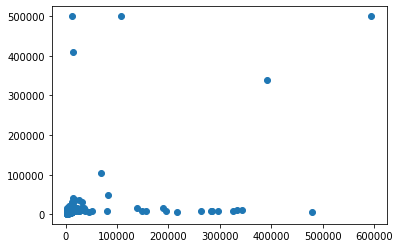

In [131]:
import matplotlib.pyplot as plt
plt.scatter(test_predictions,test_labels)

5752479.348144531

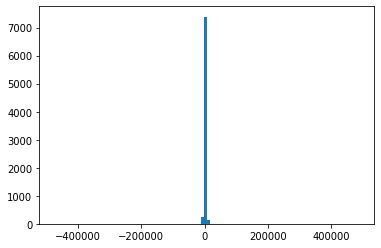

In [133]:
import matplotlib.pyplot as plt
plt.hist((test_labels.values - test_predictions), bins = 100)
(test_labels.values - test_predictions).mean()
(test_labels.values - test_predictions).sum()